<a href="https://colab.research.google.com/github/Shivashankark94/Rossmann-Sales-Prediction-Capstone-Project/blob/main/Rossmann_Sales_Prediction_Capstone_Project_ipynb(Shivashankar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

##### **Project Type**    - Machine Learning (Regression)
##### **Contribution**    - Individual

## <b> Problem Statement </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Data Description**

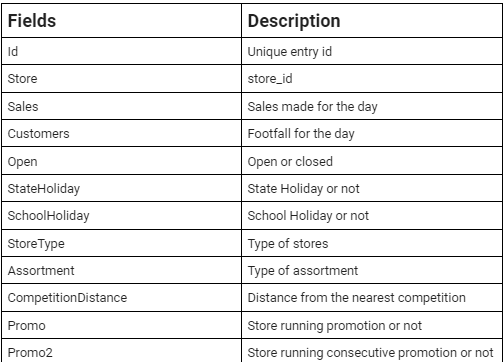

# **GitHub Link -**

# **Importing required libraries and data files**

In [ ]:
#import required libraries
#Modules for dataframe and ndarrays and maths
import numpy as np
import pandas as pd
from datetime import datetime
import math
#Vizualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
#Importing Libraries for Modelling
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
lin= LinearRegression()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Collection and Preprocessing

In [ ]:
#read csv file
sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project on ML/Rossmann Stores Data.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project on ML/store.csv')

In [ ]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# checking shape of sales dataset
sales_df.shape

(1017209, 9)

In [ ]:
# checking shape of stores dataset
stores_df.shape

(1115, 10)

In [ ]:
#We can see that the number of rows in both dataset differs significantly.
#We only have data for 1115 stores in the stores dataset, which is only 0.1%, of the total number of sales data given in the sales dataset

1115/1017209*100

0.10961365855001283

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB



*  There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types





In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB




*  There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.




# Missing data Handling


In [ ]:
#null values in stores df
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Observation**

There are four columns which contains null values those are following:

**CompetitionDistance**- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

**CompetitionOpenSinceMonth**- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month.

**CompetitionOpenSinceYear**- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month.

**Promo2SinceWeek, Promo2SinceYear and PromoInterval** -are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

# **Data Cleaning**


Treating the Null Values

In [ ]:
#checking for unique values in CompetitionOpenSinceYear
stores_df.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
#checking for unique values in CompetitionOpenSinceMonth
stores_df.CompetitionOpenSinceMonth.unique()


array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
#counting for competition stores being open for each month
stores_df.CompetitionOpenSinceMonth.value_counts()


9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [ ]:
#counting for competition stores being open for each year
stores_df.CompetitionOpenSinceYear.value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

In [ ]:
#checking the percentage of missing values in both Competition Open since Month and Year
354/1115*100

31.748878923766817

In [ ]:
#filling null values in Promo2 Since week, year and Promo Interval with 0
stores_df['Promo2SinceWeek'] = stores_df['Promo2SinceWeek'].fillna(0)

In [ ]:
stores_df.Promo2SinceWeek.isnull().sum()

0

In [ ]:
stores_df['Promo2SinceYear'] = stores_df['Promo2SinceYear'].fillna(0)

In [ ]:
stores_df['PromoInterval'] = stores_df['PromoInterval'].fillna(0)

In [ ]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [ ]:
stores_df['PromoInterval'] = stores_df['PromoInterval'].fillna(0)

In [ ]:
#filling the null values with median for CompetitionDistance column and mode for CompetitionOpenSince Year and Month
stores_df["CompetitionDistance"].fillna(stores_df["CompetitionDistance"].median(),inplace=True)
stores_df["CompetitionOpenSinceMonth"].fillna(stores_df["CompetitionOpenSinceMonth"].mode()[0],inplace=True)
stores_df["CompetitionOpenSinceYear"].fillna(stores_df["CompetitionOpenSinceYear"].mode()[0],inplace=True)

In [ ]:
stores_df = stores_df.dropna(how='all', axis=1)

## Merging the two Datasets

In [ ]:
#merge the datasets on stores data
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [ ]:
#checking for nullvalues in the new dataset
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
#first five rows of merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [ ]:
df.shape

(1017209, 18)

**Data Manipulation**

In [ ]:
# eliminating the rows where the stores are closed, i.e. rows with Open ==0, as they are not relevant to predict sales.
df = df[df.Open == 1]

In [ ]:
#Since we have removed all the rows with Open == 0, we are only left with rows where stores are Open.
# Hence dropping the Open Column from our dataset
df.drop("Open",axis=1, inplace= True)

In [ ]:
# checking for rows with zero sales
df["Store"][df["Sales"]==0].sum()

31460

In [ ]:
# calculating the percentage of rows with zero sales in our dataset
round((df["Store"][df["Sales"]==0].sum()/df["Store"].sum()*100) ,4)

0.0067

In [ ]:
# We can see that there are only 0.0067% data with zero sales so eliminating those instances from our datatset.
df = df[df.Sales!=0]

In [ ]:
#checking for information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   StoreType                  844338 non-null  object 
 9   Assortment                 844338 non-null  object 
 10  CompetitionDistance        844338 non-null  float64
 11  CompetitionOpenSinceMonth  844338 non-null  float64
 12  CompetitionOpenSinceYear   844338 non-null  float64
 13  Promo2                     8

In [ ]:
# adding a weekend column in our dataset with 0,1 values if weekend or weekdays respectively
Weekend = []
for row in df['DayOfWeek']:
    if row < 6 :    Weekend.append(0)

    else:           Weekend.append(1)

In [ ]:
#adding the weekend column in our dataset
df['Weekend'] = pd.Series(Weekend)

In [ ]:
#checking top 5 rows of dataset
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0.0
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0.0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0.0


## Unique Values in Categorical Features

In [ ]:
# making a list for all the categorical independent variables
categorical_variables = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
# making a list for all the continuous independent variables
continuous_variable_list = ["Customers","CompetitionDistance"]

In [ ]:
#defining a function to extract date, month and year from date column
def extract_year(x):
    return int(str(x)[:4])

def extract_month(x):
    return int(str(x)[5:7])

def extract_month_year(x):
    return (str(x)[:7])

In [ ]:
#creating features from the date
df['Date'] = df['Date'].apply(extract_month_year)
sales_df['Date'] = sales_df['Date'].apply(extract_month_year)
df['Year']  = df['Date'].apply(extract_year)
df['Month'] = df['Date'].apply(extract_month)
sales_df['Year']  = sales_df['Date'].apply(extract_year)
sales_df['Month'] = sales_df['Date'].apply(extract_month)

In [ ]:
#checking the unique values involved and if all the values are in appropriate datatypes
for i in categorical_variables:
  print(f'Unique values of {i} column are {df[i].unique()} ')
  print("\n")

Unique values of DayOfWeek column are [5 4 3 2 1 7 6] 


Unique values of Promo column are [1 0] 


Unique values of StateHoliday column are ['0' 'a' 'b' 'c' 0] 


Unique values of SchoolHoliday column are [1 0] 


Unique values of StoreType column are ['c' 'a' 'd' 'b'] 


Unique values of Assortment column are ['a' 'c' 'b'] 


Unique values of CompetitionOpenSinceMonth column are [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.] 


Unique values of CompetitionOpenSinceYear column are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 


Unique values of Promo2 column are [0 1] 


Unique values of Promo2SinceWeek column are [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] 


Unique values of Promo2SinceYear column are [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.] 


Unique values of PromoInterval column are [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug

We can observe :

We can see there are two Zeros in StateHoliday out of which one is text so we need to combine them to be one.

In [ ]:
# replacing text "0" with 0
df["StateHoliday"] = df["StateHoliday"].map({0: 0, "0": 0, "a":"a" , "b": "b", "c":"c"})


In [ ]:
#Counting stores present in each Store Types
df.StoreType.value_counts()

a    457042
d    258768
c    112968
b     15560
Name: StoreType, dtype: int64

In [ ]:
#Adding a column for average sales for each storetype in the dataset
Avg_storewise_sales =df.groupby('StoreType')['Store'].mean()
Avg_storewise_sales

StoreType
a    560.087410
b    555.930077
c    608.222337
d    533.887432
Name: Store, dtype: float64

# **Data Vizualization**

###  **Univariate Analysis**

* Data Vizualization for Continuous Variables*

In [ ]:
# Plotting distribution plot for each continuous variables : Customers,Sales and Competition Distance

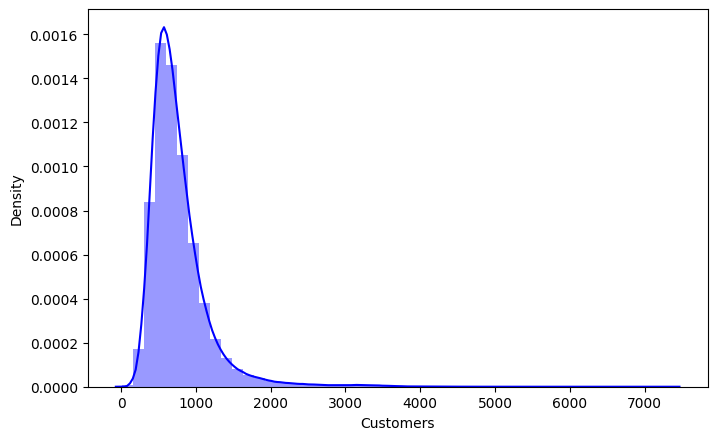

In [ ]:
sns.distplot(df['Customers'],color='Blue')
plt.show()

From the above probability density plot we can see that the 'Customers' is not normally distributed, it's a bit right skewed.To treat the skweness we are using Square root transformation for the particular variable.

In [ ]:
df["sqrt_Customers"] = np.sqrt(df["Customers"])

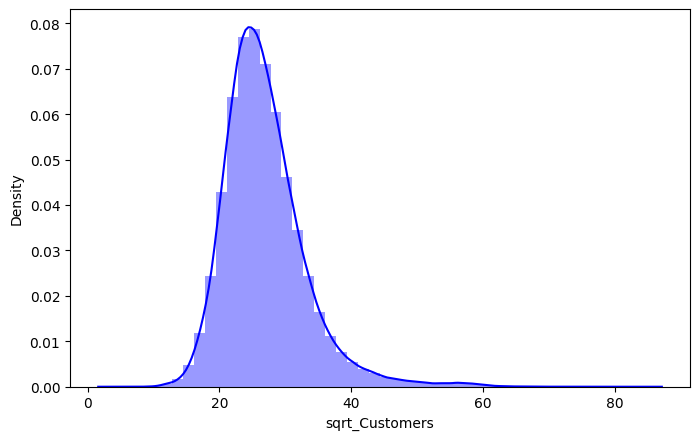

In [ ]:
sns.distplot(df["sqrt_Customers"],color='Blue')
plt.show()

Now the distribution looks better than earlier.

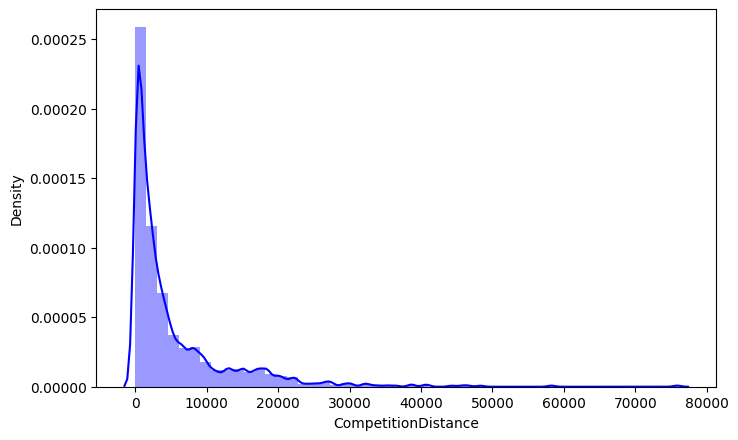

In [ ]:
sns.distplot(df['CompetitionDistance'],color='Blue')
plt.show()

In [ ]:
df["log_CompetitionDistance"] = np.log(df["CompetitionDistance"])

From the above probability density plot we can see that the 'Competition Distance' is not normally distributed, it's moderately right skewed.To treat the skweness we are using Log transformation for the particular variable.

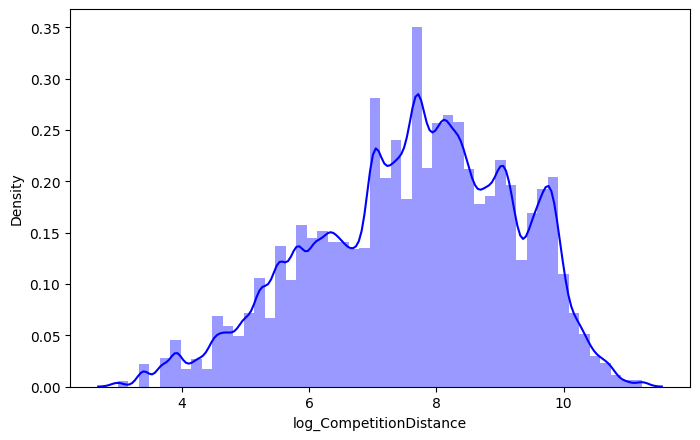

In [ ]:
sns.distplot(df["log_CompetitionDistance"],color='Blue')
plt.show()

Now the distribution looks better than earlier.

Checking the distribution of the Target Variable:Sales using distplot

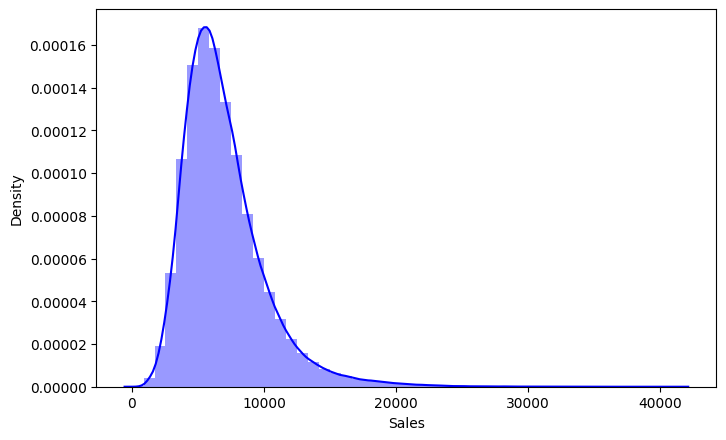

In [ ]:
sns.distplot(df['Sales'],color='Blue')
plt.show()

From the above probability density plot we can see that the target 'Sales' is not normally distributed, it's a bit rightly skewed.To treat the skweness we are using Square root transformation for the particular variable.

In [ ]:
df['sqrt_Sales']=np.sqrt(df['Sales'])

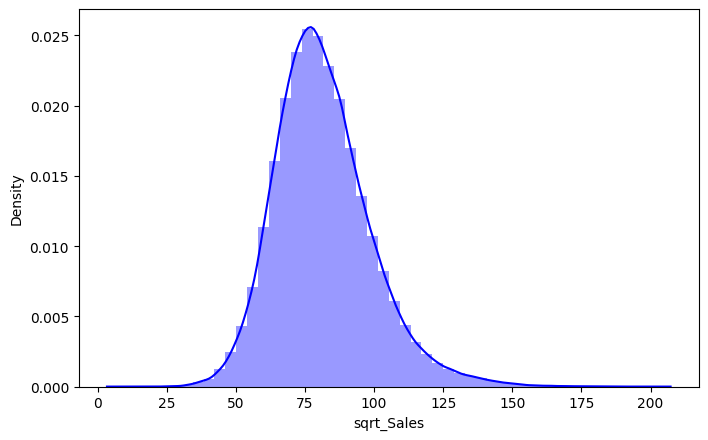

In [ ]:
sns.distplot(df['sqrt_Sales'],color='Blue')
plt.show()

We can See Square Root Transformation did a great job! Our Target Variable is normally distributed and is ready to be used in our Model.

# **Data Visualization for Categorical Independent Variables**

In [ ]:
#creating a dataframe out of the categorical variable discussed above
df_cat = df[categorical_variables]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe0cc17130>,
      dtype=object)

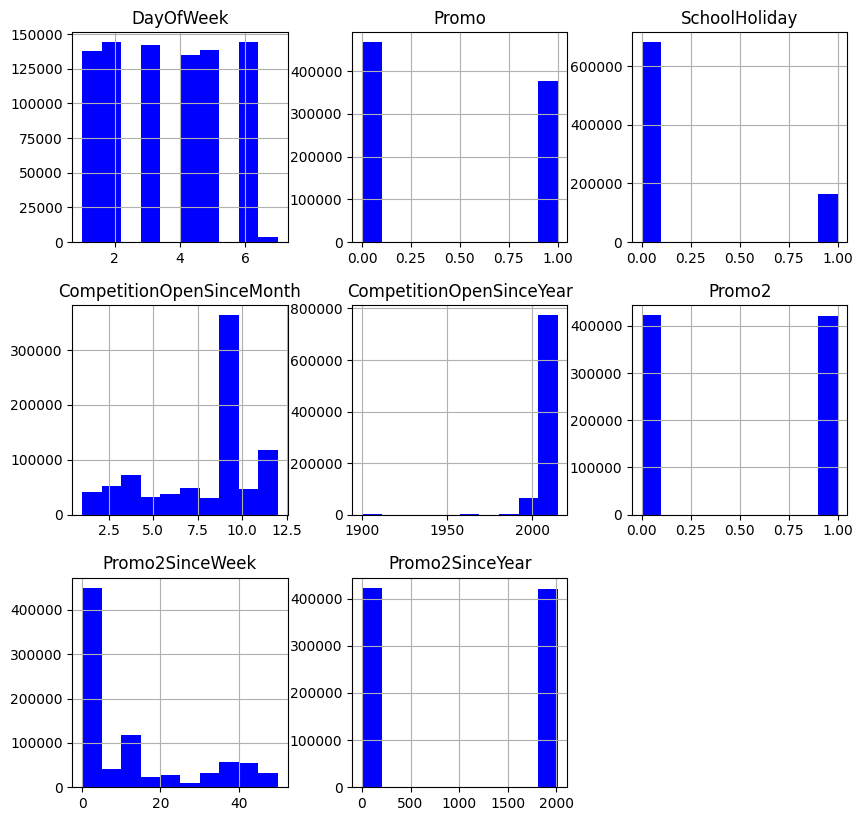

In [ ]:
# Univariate analysis of Categorical Variables in the dataset using Histograms.
df_cat.hist(color = 'B', figsize= (10,10))

# **Bivariate Analysis**

Store Type and Sales

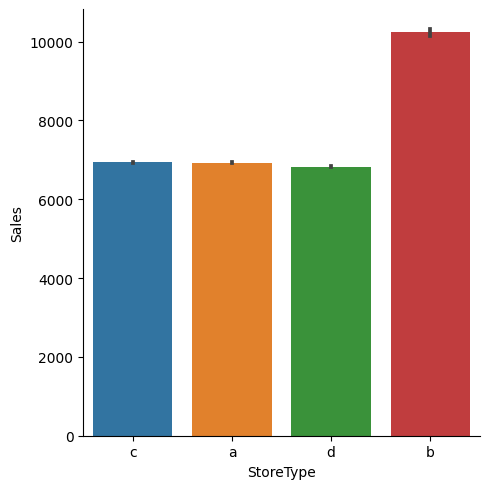

In [ ]:
# Plotting the sales for each Store Type using categorical barplot
sns.catplot(data=df , x='StoreType',y='Sales',kind='bar')


Customers and sales

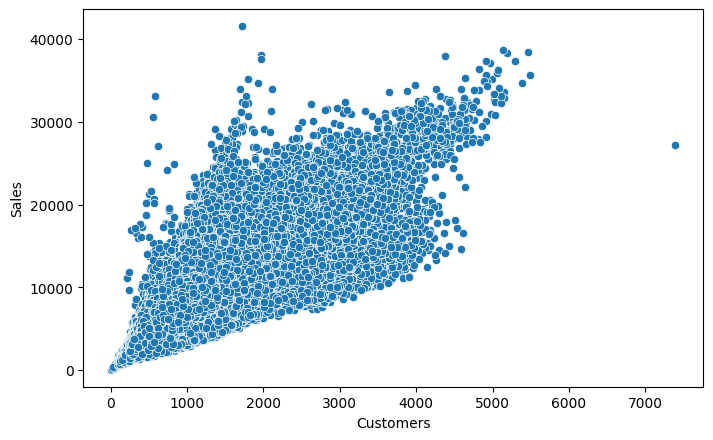

In [ ]:
#plotting relationship between no of customers and sales
sns.scatterplot(x=df['Customers'],y=df['Sales'])

Since we have applied sqrt transformations in Sales and Customers we have to check the scatterplot again.

### Sqrt_Sales vs Sqrt_Customers

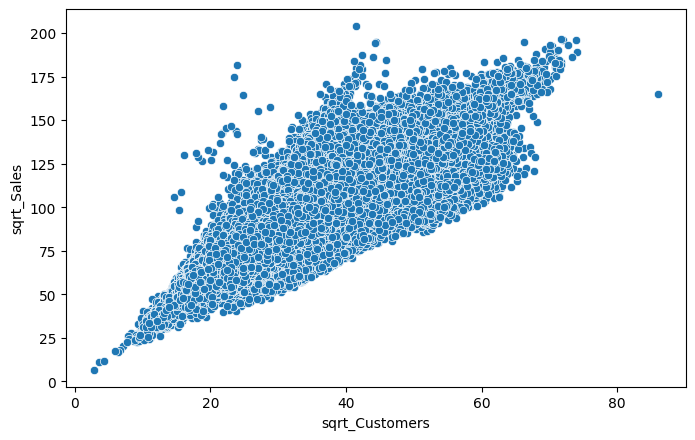

In [ ]:
sns.scatterplot(x=df['sqrt_Customers'],y=df['sqrt_Sales'])

**Observation:** sqrt_Sales and sqrt_Customer scatter plot shows a direct positive relation between them with a few outliers


### Competition Distance and Sales

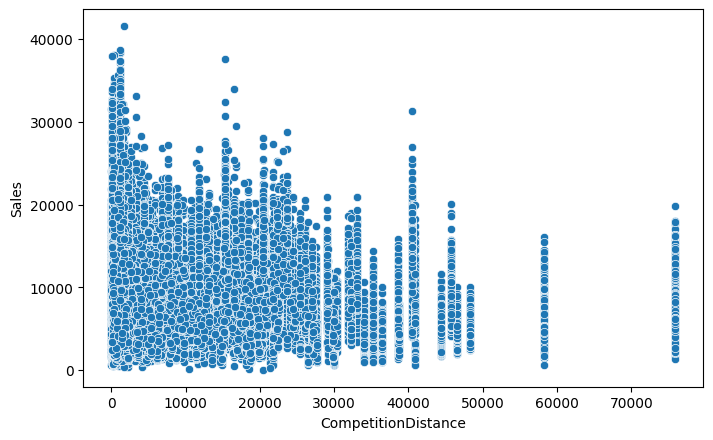

In [ ]:
# Plotting the relationship between Competition Distance and Sales using Scatterplot
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])

Sales vs Log_competitionDistance

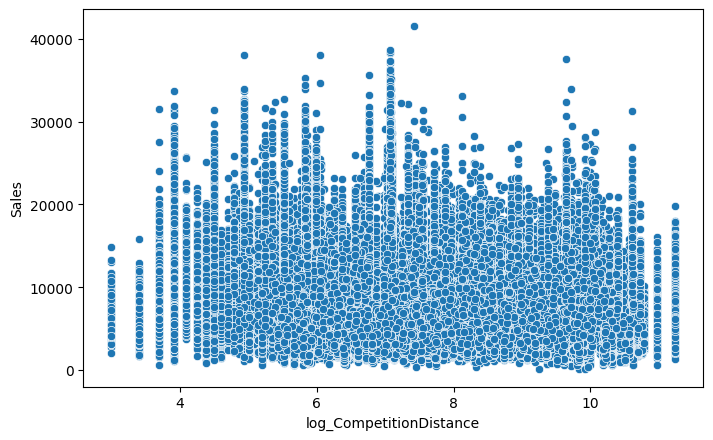

In [ ]:
# scatterplot for log_CompetitionDistance vs sales
sns.scatterplot(x=df['log_CompetitionDistance'],y=df['Sales'])

**Observation:** From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.


Date and Sales: Monthly Sales

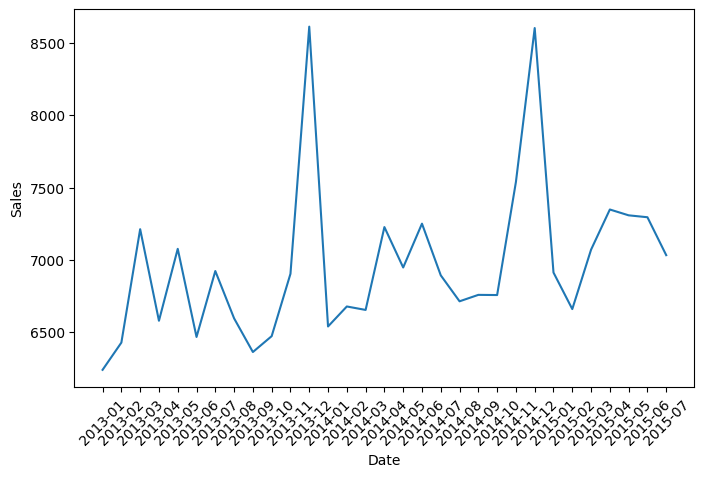

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#Monthly trend of sales using lineplot
sns.lineplot(data = df.groupby('Date')['Sales'].mean().reset_index(), x='Date', y='Sales' )
plt.xticks(rotation=45)
plt.figure(figsize=(10,10))
plt.show()

**Observation:** Clearly evident that october 2013 and october 2014 has the maximum sales. That means october is the best month in terms of sales.


State Holiday and Sales

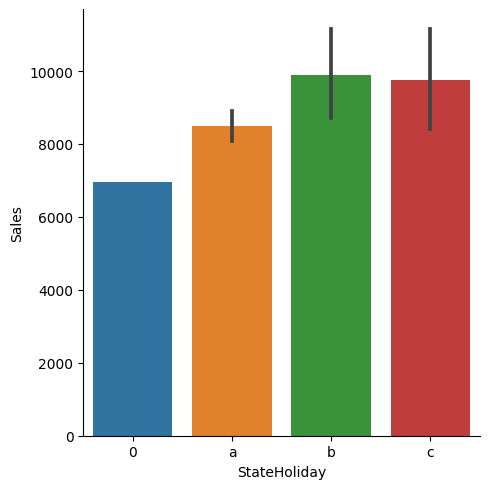

In [ ]:
# Plotting categorical bar plot for count of Sales on each State Holidays
sns.catplot(data=df, x="StateHoliday", y="Sales", kind="bar")

School Holiday and Sales

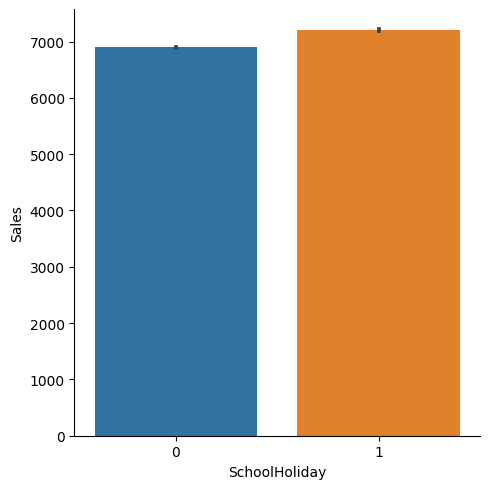

In [ ]:
# Plotting categorical bar plot for count of Sales in each School Holiday
sns.catplot(data=df, x="SchoolHoliday", y="Sales", kind="bar")

Competition Open Since Year and Sales

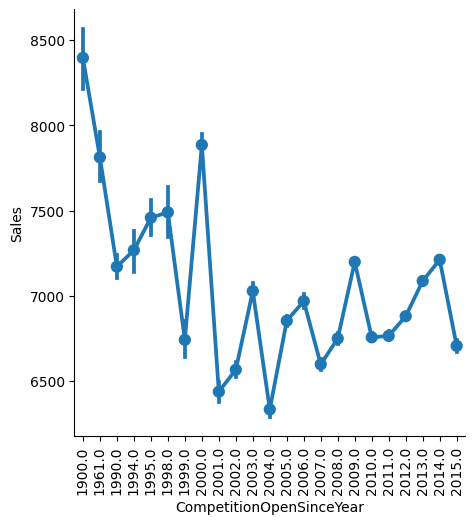

In [ ]:
#plotting line graph for showing trend in sales due to Competition open since year
sns.catplot(data=df, x="CompetitionOpenSinceYear", y="Sales", kind="point")
plt.xticks(rotation= 90)
plt.show()

In [ ]:
#adding a column average customer sales by dividing Sales with Customers
df["Avg_customer_sales"]=df.Sales/df.Customers

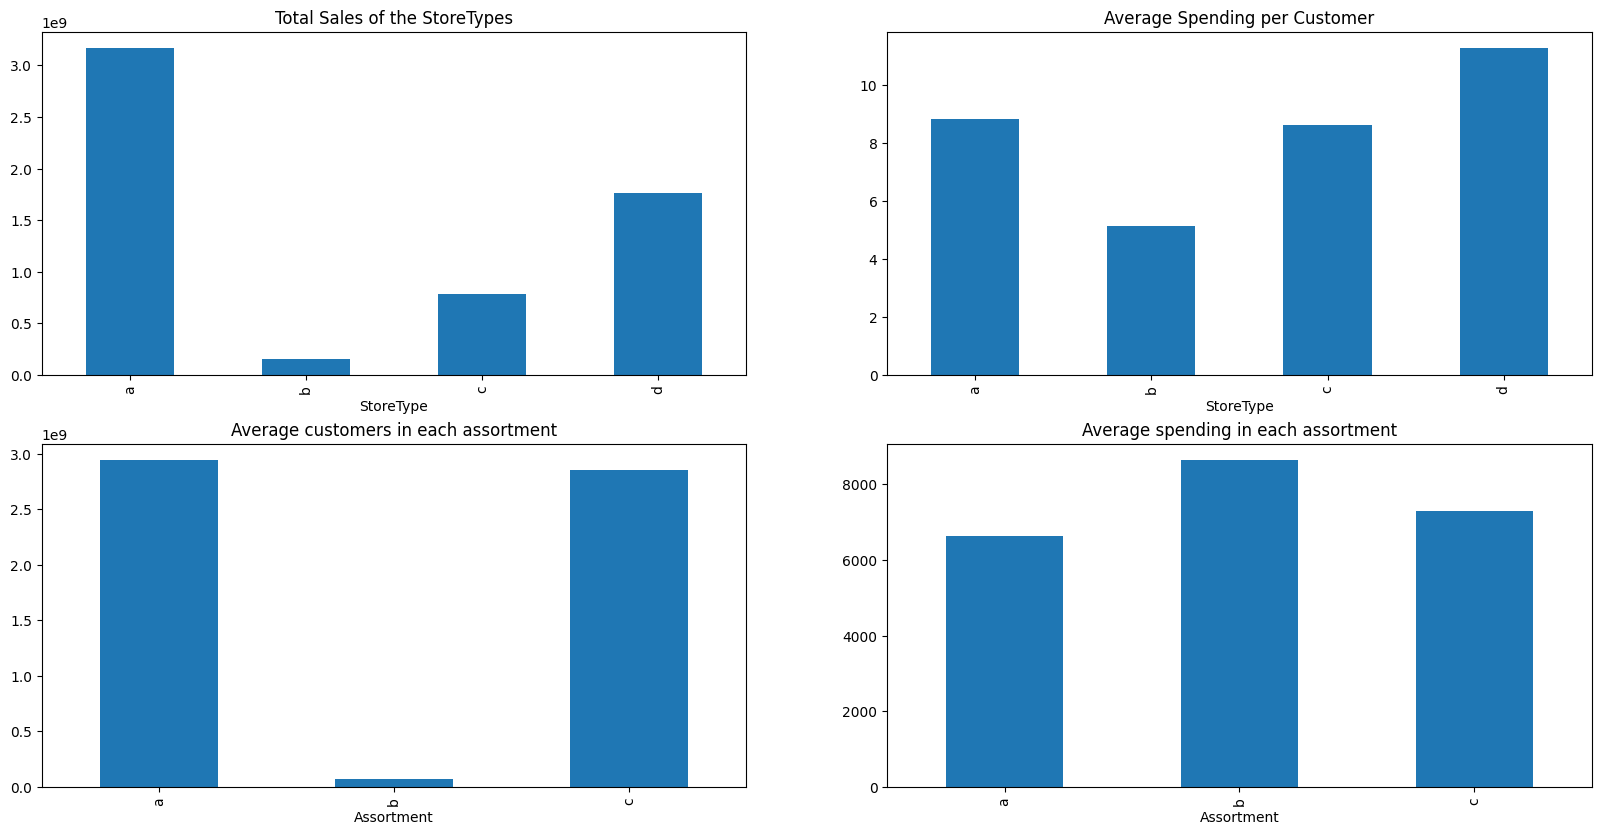

In [ ]:
#plotting Histograms showing Total Sales of Store Types, Average Spending per Customer, Average Customer per Store Type and Average sales of Store Type
f ,ax =plt.subplots(2,2 ,figsize=(20,10))
df.groupby("StoreType")["Sales"].sum().plot(kind='bar', ax =ax[0,0],title="Total Sales of the StoreTypes")
df.groupby("StoreType")["Avg_customer_sales"].mean().plot(kind='bar',ax=ax[0,1] ,title="Average Spending per Customer")
df.groupby("Assortment")["Sales"].sum().plot(kind='bar',ax=ax[1,0],title="Average customers in each assortment")
df.groupby("Assortment")["Sales"].mean().plot(kind='bar',ax=ax[1,1],title="Average spending in each assortment")

**Observation:**

*   Store a has maximum customers.
*  Store d has maximum average spendings per customers.
*  Assortment a and c has maximum customers.
* In terms of average spending per customers assortment b has maximum footfalls.


Promo and Promo2 with Sales

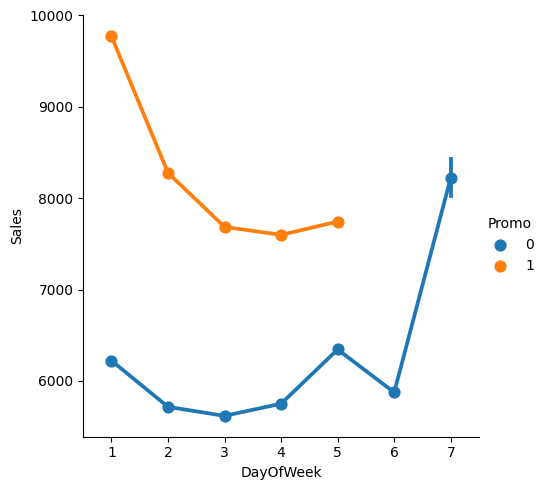

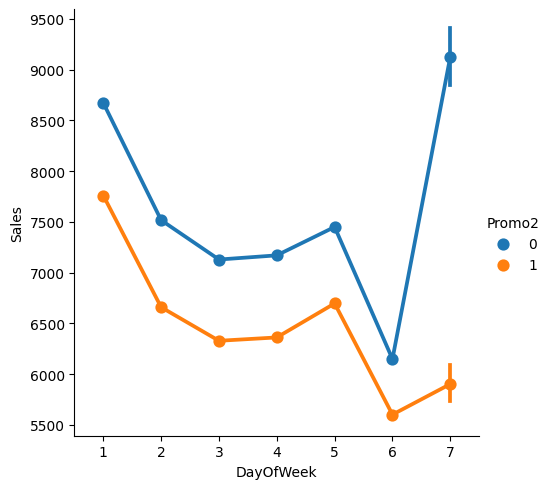

In [ ]:
#plotting day wise sales with and without promo using factorplot
sns.factorplot(data =df, x = "DayOfWeek", y = "Sales", hue = "Promo")
sns.factorplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo2")

**Observation:** So, no promotion in the weekend. However, the sales are very high. If promo offers are to be given on weekends definitely the sales are going to skyrocket.

Store Type Assortment level with Sales

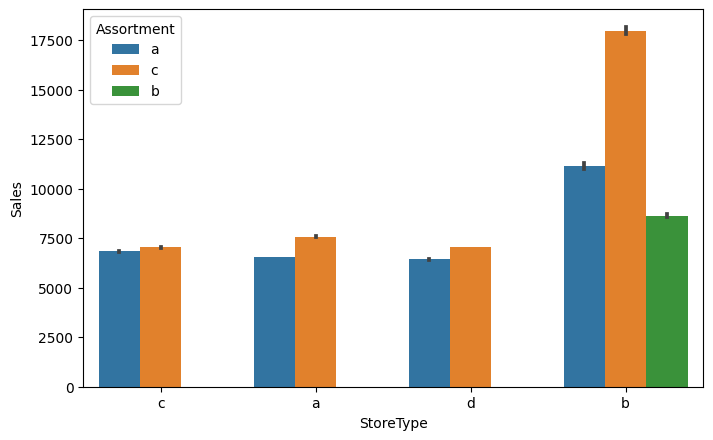

In [ ]:
#Plotting sales and assortment level for each store type using barplot
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

**Observation:**The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores

State Holiday and Average sales

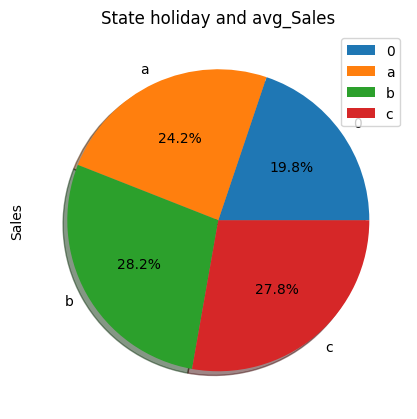

In [ ]:
#Plotting percentage of Average sales in each state holiday using pie chart
df.groupby("StateHoliday")["Sales"].mean().plot.pie(title='State holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

School Holiday and Average Sales

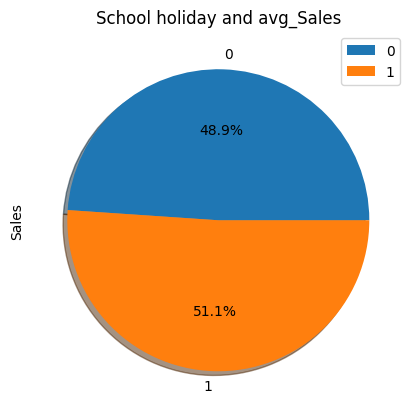

In [ ]:
#Plotting percentage of Average sales in each School Holiday using pie chart
df.groupby("SchoolHoliday")["Sales"].mean().plot.pie(title='School holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**Observation:** Clearly evident that on holiday average sales are better as compared to non holiday

# **Feature Engineering**

In [ ]:
#checking top 5 rows of the dataset to proceed with feature engineering
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend,Year,Month,sqrt_Customers,log_CompetitionDistance,sqrt_Sales,Avg_customer_sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0.0,0.0,0,0.0,2015,7,23.558438,7.146772,72.546537,9.482883
1,2,5,2015-07,6064,625,1,0,1,a,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0,2015,7,25.000000,6.345636,77.871689,9.702400
2,3,5,2015-07,8314,821,1,0,1,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",0.0,2015,7,28.653098,9.556055,91.181138,10.126675
3,4,5,2015-07,13995,1498,1,0,1,c,c,...,0.0,0.0,0,0.0,2015,7,38.704005,6.429719,118.300465,9.342457
4,5,5,2015-07,4822,559,1,0,1,a,a,...,0.0,0.0,0,0.0,2015,7,23.643181,10.305948,69.440622,8.626118


In [ ]:
#mapping holiday with 1 and non holiday with 0
df["StateHoliday"] = df["StateHoliday"].map({0:0,"0":0 ,"a":1 ,"b":1 ,"c":1})

Since any kind of holiday can be a good ocassion for customers to go shopping.

Assumption :-- Sales may not individually depend on the specific type of holiday.

# **Correlation Matrix**



Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

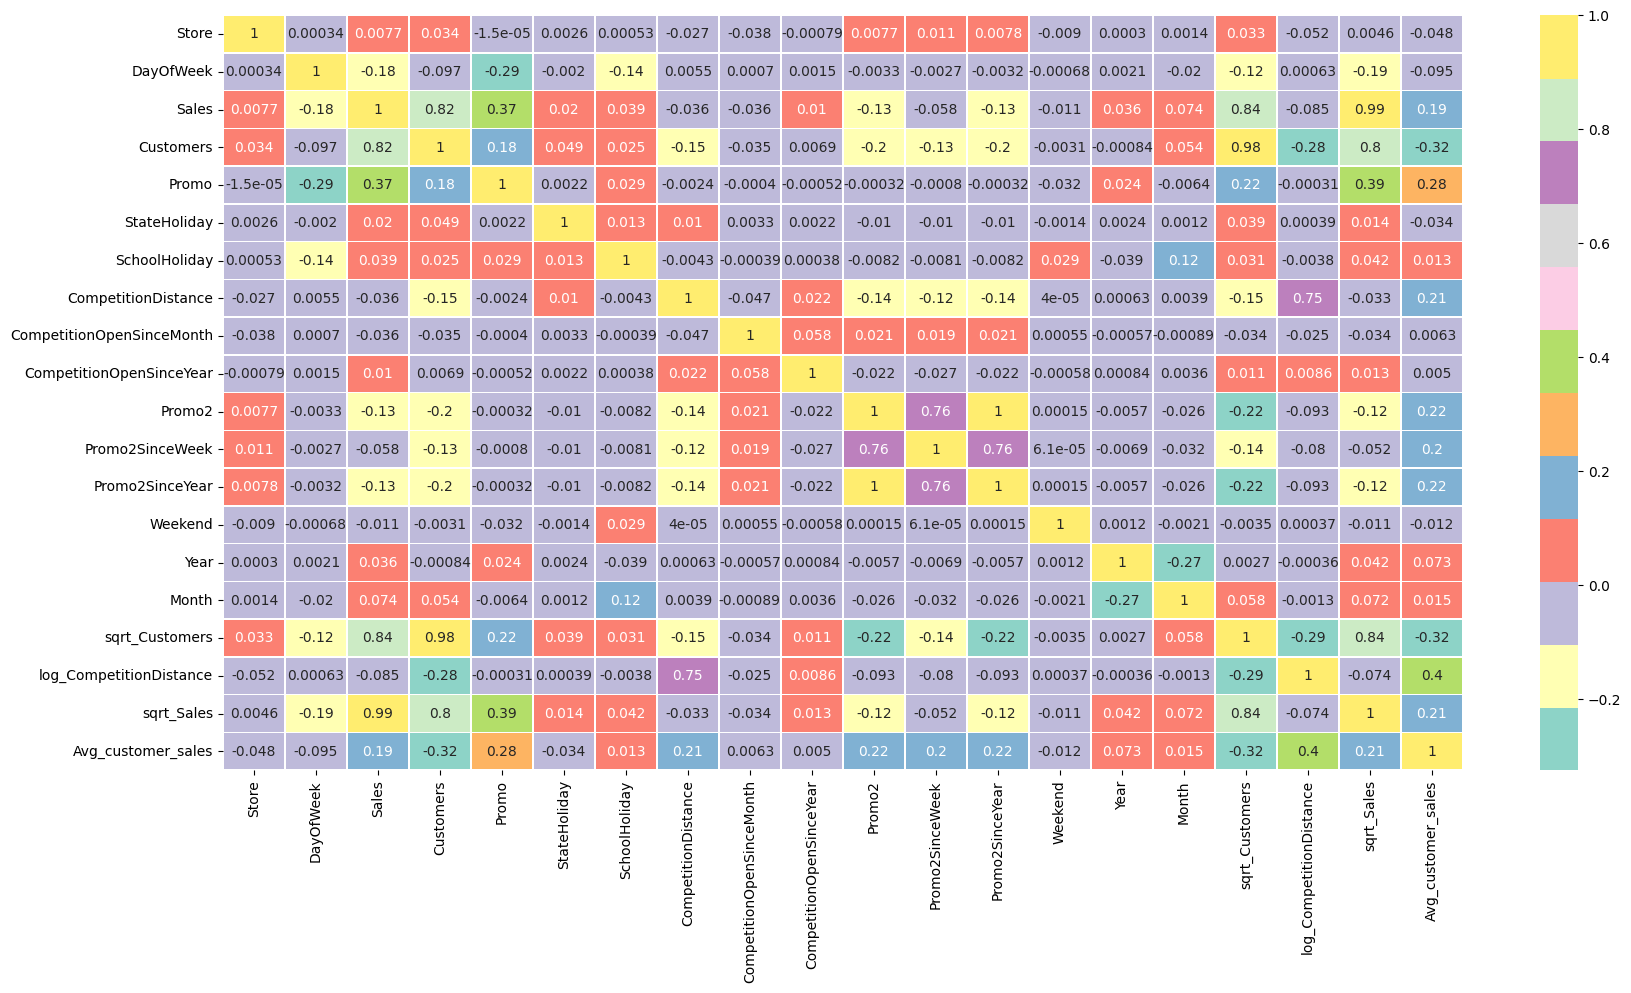

In [ ]:
#Checking correlation matrix of the whole dataset using Correlation Heatmap
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),ax=ax,annot=True,cmap="Set3",linewidth=0.5)


**Observation:**

1) Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.

2) State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

3) CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.

4) There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

5) The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

In [ ]:
#importing relevant library
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

      #calculating VIF
      vif =pd.DataFrame()
      vif["variables"] = X.columns
      vif["VIF"] = [variance_inflation_factor(X.values ,i ) for i in range (X.shape[1])]

      return(vif)

In [ ]:
#calculating vif for all columns
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Sales','Weekend','sqrt_sales']]])

,variables,VIF
0,DayOfWeek,5.814485e+00
1,Customers,1.720770e+02
2,Promo,2.419075e+00
3,StateHoliday,1.007241e+00
4,SchoolHoliday,1.282830e+00
5,CompetitionDistance,3.532367e+00
6,CompetitionOpenSinceMonth,8.942336e+00
7,CompetitionOpenSinceYear,1.404565e+05
8,Promo2,1.578233e+06
9,Promo2SinceWeek,3.990251e+00


In [ ]:
# One hot encoding for Categorical features required for modelling
df = pd.get_dummies(df ,columns =['StoreType','Assortment','Year'])

In [ ]:
df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Year_2013,Year_2014,Year_2015
0,1,5,2015-07,5263,555,1,0,1,1270.0,9.0,...,0,0,1,0,1,0,0,0,0,1
1,2,5,2015-07,6064,625,1,0,1,570.0,11.0,...,1,0,0,0,1,0,0,0,0,1
2,3,5,2015-07,8314,821,1,0,1,14130.0,12.0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  int64  
 7   SchoolHoliday              844338 non-null  int64  
 8   CompetitionDistance        844338 non-null  float64
 9   CompetitionOpenSinceMonth  844338 non-null  float64
 10  CompetitionOpenSinceYear   844338 non-null  float64
 11  Promo2                     844338 non-null  int64  
 12  Promo2SinceWeek            844338 non-null  float64
 13  Promo2SinceYear            8

# **Linear Regression**

In [ ]:
# Determing independent and dependent variable best suited for modelling
y= df["sqrt_Sales"]
x1= df[['DayOfWeek','log_CompetitionDistance','sqrt_Customers','StateHoliday', 'SchoolHoliday','Promo','Promo2','StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b',
       'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek']]

In [ ]:
# # fitting models as per statsmodel and getting the summary
# x=sm.add_constant(x1)
# results = sm.OLS(y,x).fit()
# results.summary()

In [ ]:
#Divding the data set into Training and testing dataset using Test Train split
#we have takes 70% - 30% ratio for Test Train Split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3, random_state=1)

In [ ]:
# apply scaling on training data
scaler=StandardScaler()

x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

In [ ]:
#fitting training data into the linear regression model
linreg = lin.fit(x_train1, y_train)

In [ ]:
# defining RMSE function (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x,y):
   return sqrt(mean_squared_error(x,y))

# defining MAPE function (Mean Absolute Percentage Error)
def mape(x,y):
    return np.mean(np.abs((x-y) / x)) *100

# get cross validation scores
y_predicted = linreg.predict(x_train1)
y_test_predicted = linreg.predict(x_test1)

print("Regression model score", ":" , linreg.score(x_train1 ,y_train),  "\n",
      "Out of sample Test score" , ":" , linreg.score(x_test1,y_test))
print("\n")

print("Training RMSE" ,":" , rmse(y_train ,y_predicted),
      "\nTesting RMSE" , ":" , rmse(y_test ,y_test_predicted))
print("\n")
print("Training MAPE" , ":" ,mape(y_train ,y_predicted),
      "\nTesting MAPE" , ":", mape(y_test ,y_test_predicted))


Regression model score : 0.8632730979707379 
 Out of sample Test score : 0.8620825434853236


Training RMSE : 6.460913572181647 
Testing RMSE : 6.474678884573082


Training MAPE : 6.2395040946099485 
Testing MAPE : 6.264130235846424


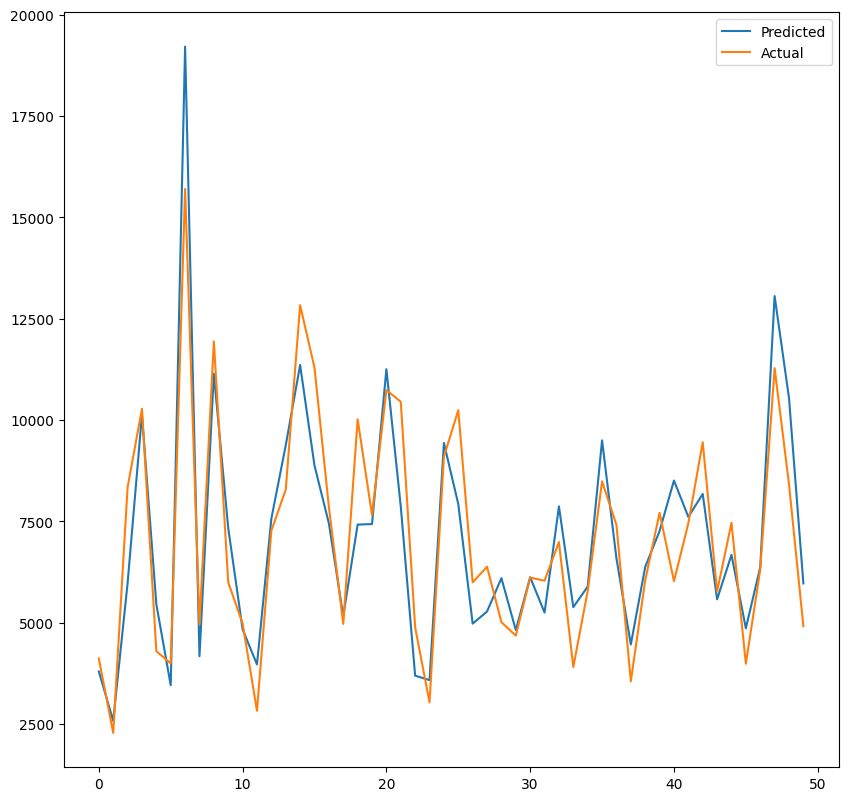

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(10,10))
plt.plot((y_test_predicted[:50]**2))
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **LASSO - LARS Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso =Lasso()

parameters = {'alpha' :[1e-55,1e-40,1e-30,1e-22,1e-20,1e-15,1e-5,1e-1,1,2]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train1,y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_ )
print("\n\nUsing",lasso_regressor.best_params_, "the negetive mean squared error is:", lasso_regressor.best_score_)


y_predicted =lasso_regressor.predict(x_train1)
y_test_predicted =lasso_regressor.predict(x_test1)

print("Training RMSE",":", rmse(y_train,y_predicted),
      "\nTesting RMSE",":", rmse(y_test,y_test_predicted))
print("\n")
print("Training MAPE",":",mape(y_train,y_predicted),
      "\nTesting MAPE",":",mape(y_test,y_test_predicted))






The best fit alpha value is found out to be : {'alpha': 1e-55}


Using {'alpha': 1e-55} the negetive mean squared error is: -41.74524511510177
Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903


Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


In [ ]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=1e-55) #fit_intercept= True, normalize=True)
lasreg = las.fit(x_train1 , y_train)
print("Regression model score",":" ,lasreg.score(x_train1 ,y_train), "\n" ,
      "Out of sample Test score",":" , lasreg.score(x_test1 ,y_test))

print("\n")
yd_predicted = lasreg.predict(x_train1)
yd_test_predicted =lasreg.predict(x_test1)

print("Training RMSE",":", rmse(y_train,y_predicted),
      "\nTesting RMSE",":", rmse(y_test,y_test_predicted))
print("\n")
print("Training MAPE",":",mape(y_train,y_predicted),
      "\nTesting MAPE",":", mape(y_test,y_test_predicted))



Regression model score : 0.8632790801198456 
 Out of sample Test score : 0.8620839187158411


Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903


Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


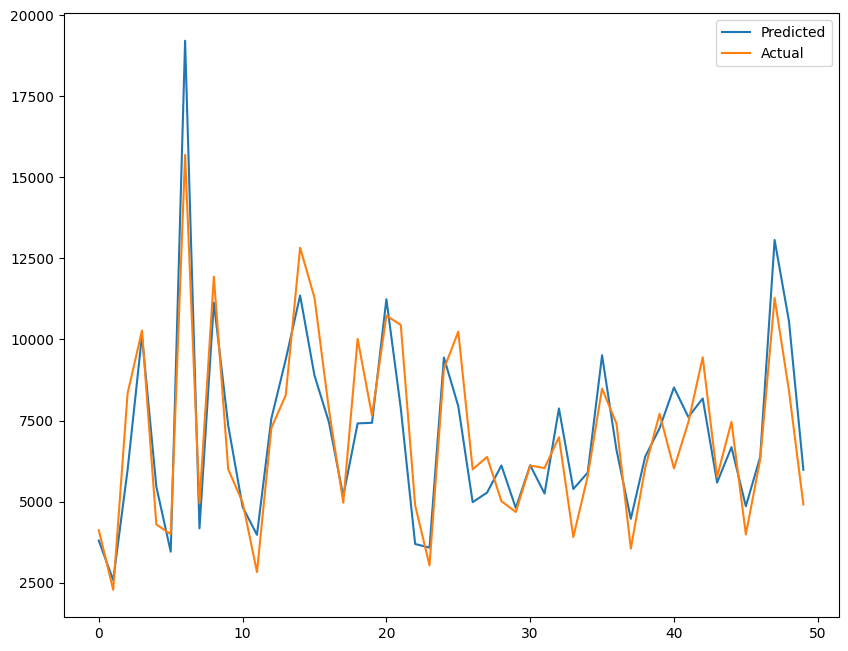

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(10,8))
plt.plot((y_test_predicted)[:50]**2)
plt.plot(np.array(y_test)[:50]**2)
plt.legend(["Predicted","Actual"])
plt.show()

**Hyperparameter Tuning using GridSearchCV**

# **RIDGE Regression**

In [ ]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(x_train1, y_train)

# validation
print("Regression model score",":",rdgreg.score(x_train1,y_train), "\n",
      "Out of sample Test score",":",rdgreg.score(x_test1,y_test))

print("\n")
yd_predicted = rdgreg.predict(x_train1)
yd_test_predicted = rdgreg.predict(x_test1)

print("Training RMSE",":",rmse(y_train,y_predicted),
      "\nTesting RMSE",":",rmse(y_test,y_test_predicted))
print("Training MAPE",":",mape(y_train,y_predicted),
      "\nTesting MAPE",":",mape(y_test, y_test_predicted))


Regression model score : 0.8632790800960524 
 Out of sample Test score : 0.8620839324953599


Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903
Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


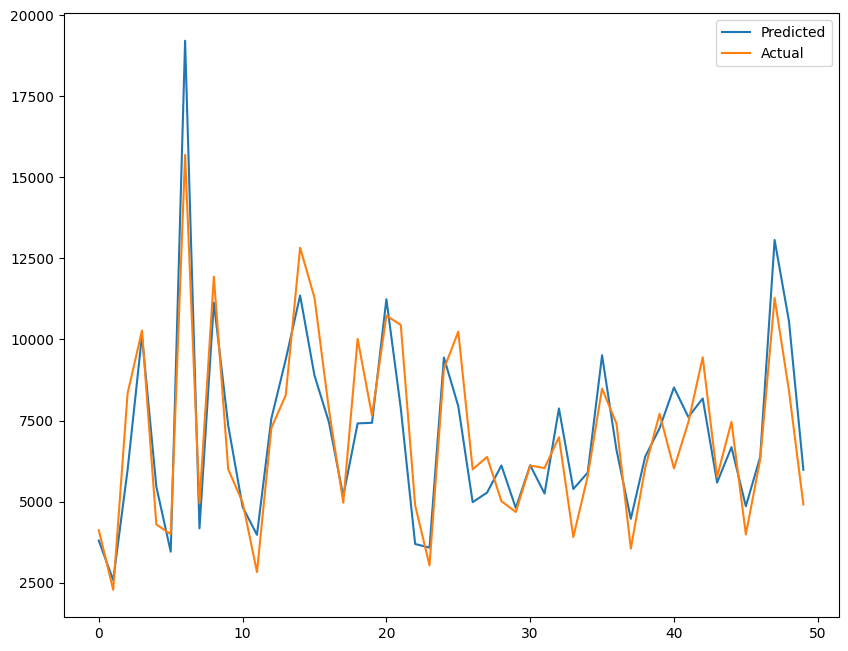

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(10,8))
plt.plot((y_test_predicted)[:50]**2)
plt.plot(np.array(y_test)[:50]**2)
plt.legend(["Predicted","Actual"])
plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg =tree.fit(x_train1 ,y_train)
print("Regression Model Score" , ":" ,treereg.score(x_train1 ,y_train),"\n",
      "Out of sample Test score" ,":",treereg.score(x_test1 ,y_test))
print("\n")
yk_predicted = treereg.predict(x_train1)
yk_test_predicted = treereg.predict(x_test1)

print("Training RMSE", ":",rmse(y_train,y_predicted),
      "\nTesting RMSE",":",rmse(y_test,y_test_predicted))
print("\n")
print("Training MAPE",":",mape(y_train,y_predicted),
      "\nTesting MAPE",":",mape(y_test,y_test_predicted))


Regression Model Score : 0.9637035071087258 
 Out of sample Test score : 0.9549916684143924


Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903


Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


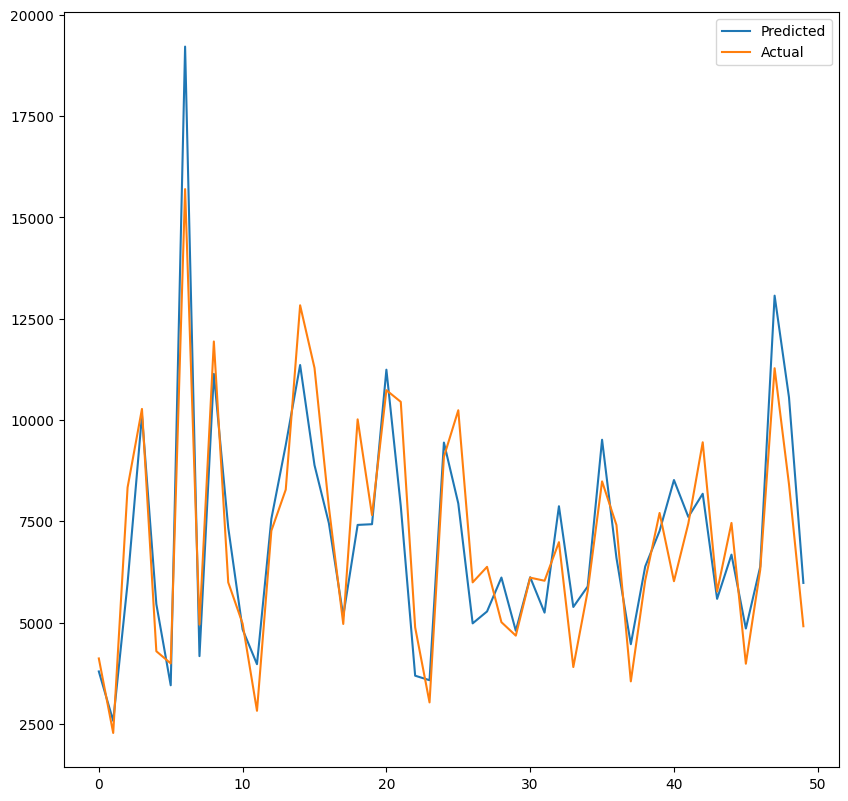

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(10,10))
plt.plot(y_test_predicted[:50]**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(x_train1, y_train)
print("Regresion Model Score" , ":" , rdfreg.score(x_train1, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , rdfreg.score(x_test1, y_test))
print("\n")
y_predicted = rdfreg.predict(x_train1)
y_test_predicted = rdfreg.predict(x_test1)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9954740752698283 
 Out of Sample Test Score : 0.9722050270361309


Training RMSE : 1.1754945182604943 
Testing RMSE : 2.9066433243083107


Training MAPE : 1.0344684814963927 
Testing MAPE : 2.6335711314823813


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_train ,y_predicted)
print("r2 score for a model which predicts mean value always is" ,r2)

r2 score for a model which predicts mean value always is 0.9954740752698283


**Feature importance as per Random Forest**

Text(0.5, 0, 'Relative Importance')

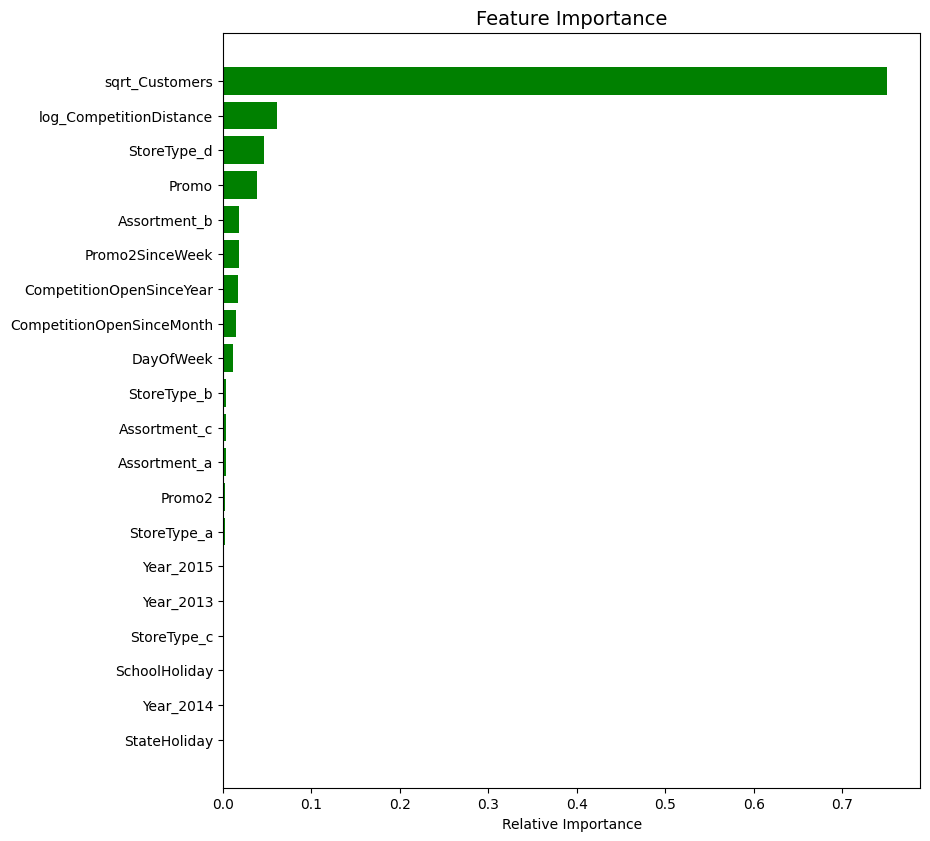

In [ ]:
features = x_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,10))
plt.title("Feature Importance",fontsize=14)
plt.barh(range(len(indices)), importances[indices],color='g',align = 'center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')

# **Final Sales Prediction**

In [ ]:
#constructing a prediction dataframe with the actual and predicted sales values.
df_prediction = pd.DataFrame(np.array((y_test)**2) ,columns =["y_test"])
df_prediction["y_test_predicted"] = np.array((y_test_predicted)**2)
df_prediction.head(25)

,y_test,y_test_predicted
0,4116.0,4033.088955
1,2277.0,2250.910891
2,8336.0,7921.273826
3,10274.0,10207.408087
4,4294.0,5008.610031
5,3993.0,3973.645494
6,15700.0,15929.619488
7,4951.0,5389.615367
8,11939.0,12142.429809
9,5994.0,6430.384922


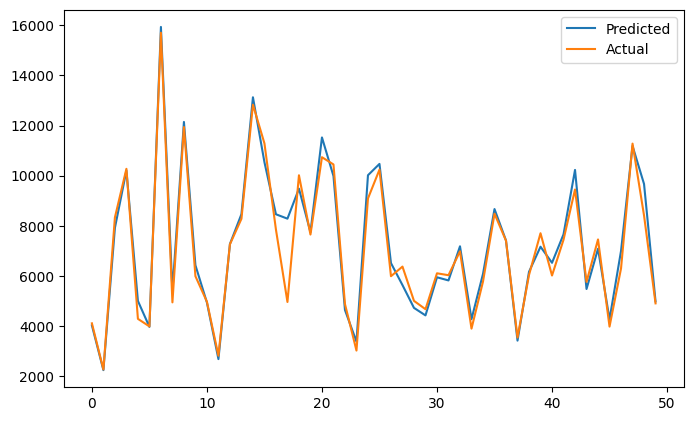

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

***Conclusion: With 99% Training Accuracy and 97% Testing Accuracy, Random Forest has proven to be the most efficient model out of the algorithms used in our model, including Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, and Random Forest.***